In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# constants
RAM_MAX = 927

In [22]:
# experiment results
columns = ['nn_name', 'depth', 'pic_size', 
           'r_fps', 'r_image_proc_time', 'r_cpu_load', 'r_temp', 'r_ram',
           'm_fps', 'm_image_proc_time', 'm_cpu_load', 'm_temp', 'm_ram']

first_row = [('mobilenet_v1_0.25_128', 0.25, 128, 14, 0.06, 0.37, 69, 208, 25, 0.013, 0.13, 65, 299),
            ('mobilenet_v1_0.25_160', 0.25, 160, 12, 0.08, 0.4, None, None, 24, 0.015, 0.18, None, None),
            ('mobilenet_v1_0.25_192', 0.25, 192, 9, 0.1, 0.43, None, None, 22, 0.02, 0.2, None, None),
            ('mobilenet_v1_0.25_224', 0.25, 224, 8, 0.11, 0.51, None, None, 20, 0.03, 0.25, None, None),
            
             ('mobilenet_v1_0.5_128', 0.5, 128, 9, 0.1, 0.44, None, None, 22, 0.015, 0.17, None, None),
            ('mobilenet_v1_0.5_160', 0.5, 160, 7.8, 0.12, 0.52, None, None, 22, 0.025, 0.2, None, None),
            ('mobilenet_v1_0.5_192', 0.5, 192, 6.5, 0.16, 0.56, None, None, 21, 0.03, 0.25, None, None),
            ('mobilenet_v1_0.5_224', 0.5, 224, 5.3, 0.18, 0.65, None, None, 20, 0.04, 0.26, None, None),
            
            ('mobilenet_v1_0.75_128', 0.75, 128, 7, 0.15, 0.53, None, None, 19, 0.02, 0.19, None, None),
            ('mobilenet_v1_0.75_160', 0.75, 160, 5.4, 0.18, 0.58, None, None, 18, 0.03, 0.2, None, None),
            ('mobilenet_v1_0.75_192', 0.75, 192, 4.4, 0.22, 0.68, None, None, 17, 0.035, 0.21, None, None),
            ('mobilenet_v1_0.75_224', 0.75, 224, 3.4, 0.29, 0.67, None, None, 17, 0.045, 0.23, None, None),
            
            ('mobilenet_v1_1.0_128', 1.0, 128, 5, 0.2, 0.57, None, None, 18, 0.025, 0.19, None, None),
            ('mobilenet_v1_1.0_160', 1.0, 160, 3.8, 0.25, 0.66, None, None, 16, 0.034, 0.2, None, None),
            ('mobilenet_v1_1.0_192', 1.0, 192, 3, 0.32, 0.68, None, None, 16, 0.043, 0.21, None, None),
            ('mobilenet_v1_1.0_224', 1.0, 224, 2.6, 0.38, 0.77, 83, 280, 15, 0.06, 0.21, 65, 197)]

exp_results = pd.DataFrame(data = first_row,
             columns = columns)

exp_results.head(3)

,nn_name,depth,pic_size,r_fps,r_image_proc_time,r_cpu_load,r_temp,r_ram,m_fps,m_image_proc_time,m_cpu_load,m_temp,m_ram
0,mobilenet_v1_0.25_128,0.25,128,14.0,0.06,0.37,69.0,208.0,25,0.013,0.13,65.0,299.0
1,mobilenet_v1_0.25_160,0.25,160,12.0,0.08,0.40,NaN,NaN,24,0.015,0.18,NaN,NaN
2,mobilenet_v1_0.25_192,0.25,192,9.0,0.10,0.43,NaN,NaN,22,0.020,0.20,NaN,NaN


In [28]:
# https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet_v1.md - data about models
mobilenet_data = pd.read_excel('mobilenet_v1.xlsx')
mobilenet_data['Depth'] = mobilenet_data['Model'].map(lambda x: x.split('_')[2])
mobilenet_data['Input Size'] = mobilenet_data['Model'].map(lambda x: x.split('_')[3])
mobilenet_data.head(3)

,Model,Million MACs,Million Parameters,Top-1 Accuracy,Top-5 Accuracy,Depth,Input Size
0,MobileNet_v1_1.0_224,569,4.24,70.9,89.9,1.0,224
1,MobileNet_v1_1.0_192,418,4.24,70.0,89.2,1.0,192
2,MobileNet_v1_1.0_160,291,4.24,68.0,87.7,1.0,160


# Plots

In [92]:
plot_df = mobilenet_data.groupby(['Depth'], as_index = False)['Top-1 Accuracy', 'Million MACs'].mean()
plot_df['Million MACs'] = plot_df['Million MACs'].astype('int')
plot_df['Top-1 Accuracy'] = plot_df['Top-1 Accuracy'].map(lambda x: np.round(x, 1))
plot_df['Depth'] = plot_df['Depth'].astype('float32')
plot_df

,Depth,Top-1 Accuracy,Million MACs
0,0.25,46.1,27
1,0.50,60.1,96
2,0.75,65.8,204
3,1.00,68.5,366


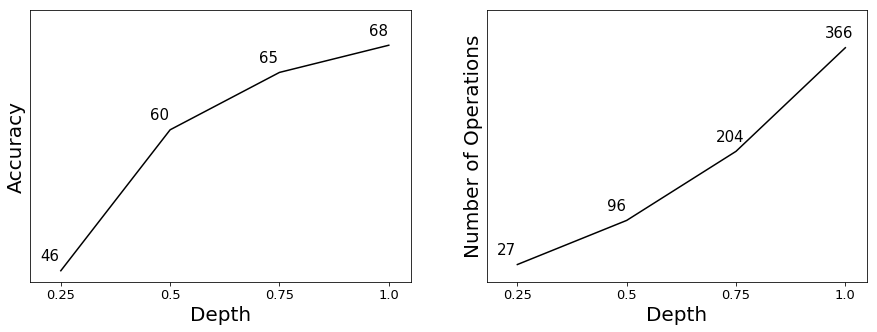

In [145]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes[0].yaxis.tick_right()
axes[0].set_xlabel('Depth', fontsize=20)
axes[0].set_xticks(plot_df['Depth'].values)
axes[0].set_xticklabels(plot_df['Depth'].values, fontdict= {'fontsize':13})
axes[0].set_ylabel('Accuracy', fontsize=20)
axes[0].set_yticks([])
axes[0].set_yticklabels([])
axes[0].plot(plot_df['Depth'], plot_df['Top-1 Accuracy'], color='black')
axes[0].set_xlim(0.18, 1.05)
axes[0].set_ylim(45, 72)
for i, row in plot_df.iterrows():
        if pd.notnull(row['Top-1 Accuracy']):
            axes[0].annotate(int(row['Top-1 Accuracy']), xy=(row['Depth'], row['Top-1 Accuracy']), xytext=(-20, 10), textcoords="offset points",
                        horizontalalignment='top', color='black', size=15, alpha = 1)


axes[1].yaxis.tick_right()
axes[1].set_xlabel('Depth', fontsize=20)
axes[1].set_xticks(plot_df['Depth'].values)
axes[1].set_xticklabels(plot_df['Depth'].values, fontdict= {'fontsize':13})
axes[1].set_ylabel('Number of Operations', fontsize=20)
axes[1].set_yticks([])
axes[1].set_yticklabels([])
axes[1].plot(plot_df['Depth'], plot_df['Million MACs'], color='black')
axes[1].set_xlim(0.18, 1.05)
axes[1].set_ylim(0, 425)
for i, row in plot_df.iterrows():
        if pd.notnull(row['Million MACs']):
            axes[1].annotate(int(row['Million MACs']), xy=(row['Depth'], row['Million MACs']), xytext=(-20, 10), textcoords="offset points",
                        horizontalalignment='top', color='black', size=15, alpha = 1)

plt.savefig('res/depth.png')

In [148]:
plot_df = mobilenet_data.groupby(['Input Size'], as_index = False)['Top-1 Accuracy', 'Million MACs'].mean()
plot_df['Million MACs'] = plot_df['Million MACs'].astype('int')
plot_df['Top-1 Accuracy'] = plot_df['Top-1 Accuracy'].map(lambda x: np.round(x, 1))
plot_df['Input Size'] = plot_df['Input Size'].astype('int')
plot_df

,Input Size,Top-1 Accuracy,Million MACs
0,128,56.3,88
1,160,59.5,137
2,192,61.6,198
3,224,63.1,269


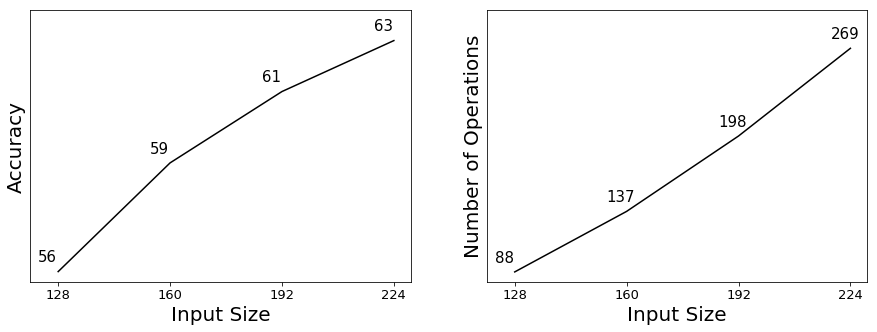

In [160]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes[0].yaxis.tick_right()
axes[0].set_xlabel('Input Size', fontsize=20)
axes[0].set_xticks(plot_df['Input Size'].values)
axes[0].set_xticklabels(plot_df['Input Size'].values, fontdict= {'fontsize':13})
axes[0].set_ylabel('Accuracy', fontsize=20)
axes[0].set_yticks([])
axes[0].set_yticklabels([])
axes[0].plot(plot_df['Input Size'], plot_df['Top-1 Accuracy'], color='black')
axes[0].set_xlim(120)
axes[0].set_ylim(56, 64)
for i, row in plot_df.iterrows():
        if pd.notnull(row['Top-1 Accuracy']):
            axes[0].annotate(int(row['Top-1 Accuracy']), xy=(row['Input Size'], row['Top-1 Accuracy']), xytext=(-20, 10), textcoords="offset points",
                        horizontalalignment='top', color='black', size=15, alpha = 1)


axes[1].yaxis.tick_right()
axes[1].set_xlabel('Input Size', fontsize=20)
axes[1].set_xticks(plot_df['Input Size'].values)
axes[1].set_xticklabels(plot_df['Input Size'].values, fontdict= {'fontsize':13})
axes[1].set_ylabel('Number of Operations', fontsize=20)
axes[1].set_yticks([])
axes[1].set_yticklabels([])
axes[1].plot(plot_df['Input Size'], plot_df['Million MACs'], color='black')
axes[1].set_xlim(120)
axes[1].set_ylim(80, 300)
for i, row in plot_df.iterrows():
        if pd.notnull(row['Million MACs']):
            axes[1].annotate(int(row['Million MACs']), xy=(row['Input Size'], row['Million MACs']), xytext=(-20, 10), textcoords="offset points",
                        horizontalalignment='top', color='black', size=15, alpha = 1)

plt.savefig('res/input_size.png')

In [29]:
mobilenet_data

,Model,Million MACs,Million Parameters,Top-1 Accuracy,Top-5 Accuracy,Depth,Input Size
0,MobileNet_v1_1.0_224,569,4.24,70.9,89.9,1.0,224
1,MobileNet_v1_1.0_192,418,4.24,70.0,89.2,1.0,192
2,MobileNet_v1_1.0_160,291,4.24,68.0,87.7,1.0,160
3,MobileNet_v1_1.0_128,186,4.24,65.2,85.8,1.0,128
4,MobileNet_v1_0.75_224,317,2.59,68.4,88.2,0.75,224
5,MobileNet_v1_0.75_192,233,2.59,67.2,87.3,0.75,192
6,MobileNet_v1_0.75_160,162,2.59,65.3,86.0,0.75,160
7,MobileNet_v1_0.75_128,104,2.59,62.1,83.9,0.75,128
8,MobileNet_v1_0.50_224,150,1.34,63.3,84.9,0.50,224
9,MobileNet_v1_0.50_192,110,1.34,61.7,83.6,0.50,192
